In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# LARS

/usr/local/lib/python3.4/dist-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Step		Added		Dropped		Active set size		C
0		2				1		19960.733269
1		8				2		18696.7980058
2		3				3		9521.69759738
3		6				4		6645.07641798
4		1				5		2735.84447649
5		9				6		1866.54369652
6		4				7		1449.91074453
7		7				8		420.081823008
8		5				9		115.157274041
9		0				10		106.993857228


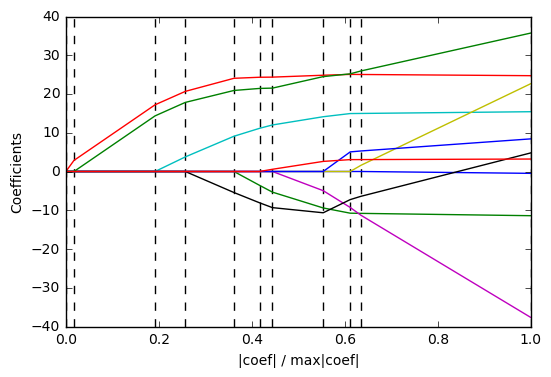

In [3]:
import numpy as np

from sklearn import linear_model
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

diabetes = datasets.load_diabetes()
X = StandardScaler().fit_transform(diabetes.data)
y = StandardScaler(with_mean=True, with_std=False).fit_transform(diabetes.target)

alphas, _, coefs = linear_model.lars_path(X, y, verbose=2)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.axis('tight')
plt.show()


In [4]:
regr = linear_model.Lars()

regr.fit(X, y)

print("Coefficients are:", regr.coef_)
print("See also the ending points of the previous graph")

Coefficients are: [ -0.47623169 -11.40703082  24.72625713  15.42967916 -37.68035801
  22.67648701   4.80620008   8.422084    35.73471316   3.21661161]
See also the ending points of the previous graph


In [5]:
print("R2 score is", regr.score(X,y))

R2 score is 0.517749425413


# Bayesian regression

In [6]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=10, n_features=1, n_informative=1, noise=3, random_state=1)

In [7]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

test_x = 2*np.max(X)
pred_test_x = regr.predict(test_x)
pred_test_x

array([ 10.79983753])

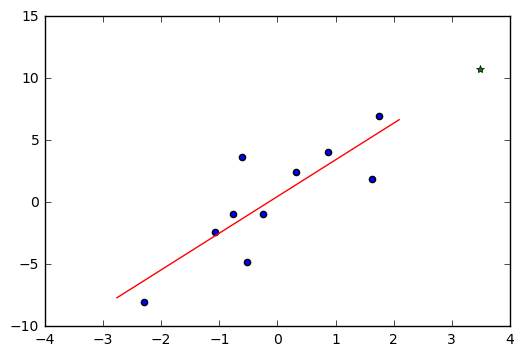

In [8]:
plt.scatter(X, y)
x_bounds = np.array([1.2*np.min(X), 1.2*np.max(X)]).reshape(-1, 1)
plt.plot(x_bounds, regr.predict(x_bounds) , 'r-')
plt.plot(test_x, pred_test_x, 'g*')
plt.show()

In [9]:
regr = linear_model.BayesianRidge()
regr.fit(X, y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

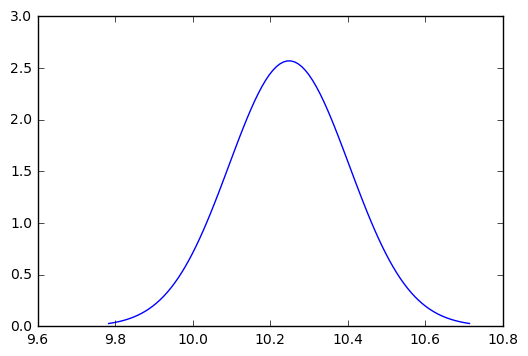

In [10]:
from matplotlib.mlab import normpdf

mean = regr.predict(test_x)
stddev = regr.alpha_
plt_x = np.linspace(mean-3*stddev, mean+3*stddev,100)
plt.plot(plt_x, normpdf(plt_x, mean, stddev))
plt.show()

In [11]:
regr.alpha_

0.1551883088373445

# linear SVM - hinge loss

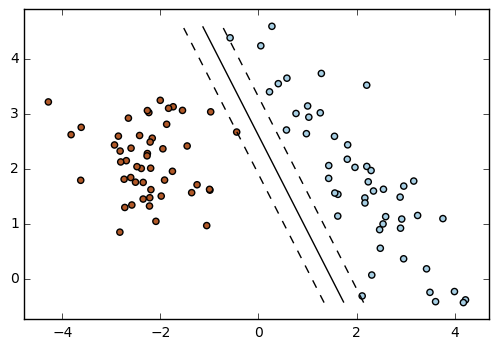

In [12]:
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier

# we create 50 separable points
X, y = make_classification(n_samples=100, n_features=2, 
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=2, 
                           random_state=101)

# fit the model
clf = SGDClassifier(loss="hinge", n_iter=500, random_state=101, 
                    alpha=0.001)
clf.fit(X, y)

# plot the line, the points, and the nearest vectors to the plane
xx = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 10)
yy = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1.0, 0.0, 1.0]
linestyles = ['dashed', 'solid', 'dashed']
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

plt.show()


In [13]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=10000, n_features=20, 
                           n_informative=5, n_redundant=5,
                           n_clusters_per_class=2, class_sep=1,
                           random_state=101)


X_train, X_test, y_train, y_test =  train_test_split(
    X, y, test_size=0.3, random_state=101)

clf_1 = SGDClassifier(loss="hinge", random_state=101)
clf_1.fit(X_train, y_train)

clf_2 = SGDClassifier(loss="log", random_state=101)
clf_2.fit(X_train, y_train)

print('SVD            : ', accuracy_score(y_test, clf_1.predict(X_test)))
print('Log. Regression: ', accuracy_score(y_test, clf_2.predict(X_test)))

SVD            :  0.814333333333
Log. Regression:  0.757


In [14]:
%timeit clf_1.fit(X_train, y_train)

100 loops, best of 3: 3.8 ms per loop


In [15]:
%timeit clf_2.fit(X_train, y_train)

100 loops, best of 3: 5.76 ms per loop


### SVR

In [16]:
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import load_boston


boston = load_boston()
X = StandardScaler().fit_transform(boston['data'])
y = boston['target']


X_train, X_test, y_train, y_test =  train_test_split(
    X, y, test_size=0.3, random_state=101)

regr_1 = SVR(kernel='linear')
regr_1.fit(X_train, y_train)

regr_2 = SGDRegressor(random_state=101)
regr_2.fit(X_train, y_train)

print('SVR            : ', mean_absolute_error(y_test, regr_1.predict(X_test)))
print('Lin. Regression: ', mean_absolute_error(y_test, regr_2.predict(X_test)))

SVR            :  3.67434988716
Lin. Regression:  3.7487663498


# Decision Trees

In [17]:
from sklearn.tree import DecisionTreeRegressor

regr = DecisionTreeRegressor(random_state=101)
regr.fit(X_train, y_train)

mean_absolute_error(y_test, regr.predict(X_test))

3.2842105263157895

# Ensemble

In [18]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=100, 
                             n_jobs=-1, random_state=101)
regr.fit(X_train, y_train)
mean_absolute_error(y_test, regr.predict(X_test))

2.6412236842105261

In [19]:
sorted(zip(regr.feature_importances_, boston['feature_names']),
       key=lambda x: -x[0])

[(0.52639646470399315, 'LSTAT'),
 (0.27921428015177541, 'RM'),
 (0.054353831310065687, 'DIS'),
 (0.031820451224154722, 'CRIM'),
 (0.029793467094947356, 'NOX'),
 (0.021350472586185009, 'PTRATIO'),
 (0.015375071104791901, 'AGE'),
 (0.015233565046354791, 'TAX'),
 (0.01095820296701624, 'B'),
 (0.0075592385798185944, 'INDUS'),
 (0.0055375893522671962, 'RAD'),
 (0.001348634019939781, 'ZN'),
 (0.0010587318586900362, 'CHAS')]

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

regr = GradientBoostingRegressor(n_estimators=500, 
                                 learning_rate=0.01, 
                                 random_state=101)
regr.fit(X_train, y_train)
mean_absolute_error(y_test, regr.predict(X_test))

2.6148878419996806

In [21]:
sorted(zip(regr.feature_importances_, boston['feature_names']),
       key=lambda x: -x[0])

[(0.26442820639779868, 'LSTAT'),
 (0.21170609523931225, 'RM'),
 (0.11520512234965929, 'DIS'),
 (0.078532434845484278, 'TAX'),
 (0.075850985431776763, 'PTRATIO'),
 (0.0756604687541029, 'NOX'),
 (0.052097327327291075, 'B'),
 (0.041177393920216847, 'CRIM'),
 (0.034255068725583829, 'AGE'),
 (0.023541808250096587, 'INDUS'),
 (0.012189199051061582, 'CHAS'),
 (0.011705380397086919, 'RAD'),
 (0.0036505093105288107, 'ZN')]

In [22]:
# Your own weak classifier

In [23]:
from sklearn.ensemble import BaggingRegressor
bagging = BaggingRegressor(SGDRegressor(), n_jobs=-1,
                           n_estimators=1000, random_state=101,
                           max_features=0.8)
bagging.fit(X_train, y_train)
mean_absolute_error(y_test, bagging.predict(X_test))

3.8345485952100637

In [24]:
from sklearn.ensemble import AdaBoostRegressor
booster = AdaBoostRegressor(SGDRegressor(), random_state=101,
                            n_estimators=100, learning_rate=0.01)

booster.fit(X_train, y_train)
mean_absolute_error(y_test, booster.predict(X_test))

3.862112809435434

# GBM LAD

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

regr = GradientBoostingRegressor('lad',
                                 n_estimators=500, 
                                 learning_rate=0.1, 
                                 random_state=101)
regr.fit(X_train, y_train)
mean_absolute_error(y_test, regr.predict(X_test))

2.6216986613160258